# 넘파이 배열 프로그래밍¶

Python의 데이터 조작은 NumPy array 조작과 거의 동의어이며, Pandas와 같은 최신 도구도 NumPy array를 중심으로 구성된다.

이 시간에는 넘파이(NumPy) 패키지를 사용한 배열(array) 프로그래밍에 대해 공부한다. 

배열 프로그래밍은 대량의 동일형 데이터를 빠르게 조작하는데 유형한 도구로 데이터 분석과 딥러닝 등에서 자주 사용된다. 데이터 분석 관련 파이썬의 명령은 거의 대부분 넘파이 기능을 사용하므로 데이터 분석을 위해서는 Numpy를 잘 알고 있어야 한다.

## 학습 목표¶
* 배열과 리스트의 차이점을 알고 배열을 사용하는 이유를 이해한다.
* 배열을 생성하고 다루는 방법을 익힌다.
* 넘파이를 사용하여 기술 통계를 낼 수 있다.
* 난수를 발생시키고 그 결과를 분석하는 방법을 공부한다.

## 1 넘파이 배열¶

### 넘파이(NumPy)

많은 숫자 데이터를 하나의 변수에 넣고 관리 할 때 리스트는 속도가 느리고 메모리를 많이 차지하는 단점이 있다. 배열(array)을 사용하면 적은 메모리로 많은 데이터를 빠르게 처리할 수 있다. 배열은 리스트와 비슷하지만 다음과 같은 점에서 다르다.

* 모든 원소가 같은 자료형이어야 한다.
* 원소의 갯수를 바꿀 수 없다.

파이썬은 자체적으로 배열 자료형을 제공하지 않는다. 따라서 배열을 구현한 다른 패키지를 임포트해야 한다. 파이썬에서 배열을 사용하기 위한 표준 패키지는 넘파이(NumPy)이며, 다차원의 배열 자료구조 클래스인 **ndarray** 클래스를 지원하며 벡터와 행렬을 사용하는 선형대수 계산에 주로 사용된다. 

넘파이의 배열 연산은 C로 구현된 내부 반복문을 사용하기 때문에 파이썬 반복문에 비해 속도가 빠르며 벡터화 연산(vectorized operation)을 이용하여 간단한 코드로도 복잡한 선형 대수 연산을 수행할 수 있다. 또한 배열 인덱싱(array indexing)을 사용한 질의(Query) 기능을 이용하여 간단한 코드로도 복잡한 수식을 계산할 수 있다.

###  넘파이 패키지 임포트¶

배열을 사용하기 위해서는 우선 다음과 같이 넘파이 패키지를 임포트한다. 넘파이는 np라는 이름으로 임포트하는 것이 관례이다.

```
import numpy as np
```

In [1]:
import numpy as np

### 1차원 배열 만들기¶

#### array

넘파이의 array 함수에 리스트를 넣으면 ndarray 클래스 객체 즉, 배열로 변환해 준다. 따라서 1 차원 배열을 만드는 방법은 다음과 같다.

```
ar = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ar
#출력 결과 : array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

리스트와 비슷해 보이지만 type 명령으로 자료형을 살펴보면 ndarray임을 알 수 있다.

```
type(ar)
#출력 결과: numpy.ndarray
```

만들어진 ndarray 객체의 표현식(representation)을 보면 바깥쪽에 array()란 것이 붙어 있을 뿐 리스트와 동일한 구조처럼 보인다. 그러나 배열 객체와 리스트 객체는 많은 차이가 있다.

우선 리스트 클래스 객체는 각각의 원소가 다른 자료형이 될 수 있다. 그러나 배열 객체 객체는 C언어의 배열처럼 연속적인 메모리 배치를 가지기 때문에 모든 원소가 같은 자료형이어야 한다. 이러한 제약사항이 있는 대신 원소에 대한 접근과 반복문 실행이 빨라진다.

In [2]:
ar = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
type(ar)

numpy.ndarray

### 벡터화 연산¶

#### 벡터화 연산(vectorized operation)

배열 객체는 배열의 각 원소에 대한 반복 연산을 하나의 명령어로 처리하는 벡터화 연산(vectorized operation)을 지원한다. 예를 들어 다음처럼 여러개의 데이터를 모두 2배 해야 하는 경우를 생각하자.

```
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

for 반복문을 사용하면 다음과 같이 구현할 수 있다.

```
answer = []
for di in data:
    answer.append(2 * di)
answer
#출력결과: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
```

하지만 벡터화 연산을 사용하면 다음과 같이 for 반복문이 없이 한번의 연산으로 할 수 있다. 계산 속도도 반복문을 사용할 때 보다 훨씬 빠르다.

```
x = np.array(data)
x
#출력결과 : array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
2 * x
#출력결과 : array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])
```

참고로 일반적인 리스트 객체에 정수를 곱하면 객체의 크기가 정수배 만큼으로 증가한다.

```
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(2 * L)
#출력결과: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

벡터화 연산은 비교 연산과 논리 연산을 포함한 모든 종류의 수학 연산에 대해 적용된다. 

```
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
2 * a + b
#출력결과: array([12, 24, 36])
a == 2
#출력결과: array([False,  True, False])
b > 10
#출력결과: array([False,  True,  True])
(a == 2) & (b > 10)
#출력결과: array([False,  True, False])
```

In [4]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
type(data)

list

In [5]:
answer = []
for di in data:
    answer.append(2 * di)
answer

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [6]:
x = np.array(data)
x
# 출력결과 : array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
2 * x
# 출력결과 : array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [7]:
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(2 * L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
2 * a + b

array([12, 24, 36])

In [9]:
a == 2

array([False,  True, False])

In [10]:
b > 10

array([False,  True,  True])

In [11]:
(a == 2) & (b > 10)

array([False,  True, False])

### 2차원 배열 만들기¶

ndarray 는 N-dimensional Array의 약자이다. 이름 그대로 1차원 배열 이외에도 2차원 배열, 3차원 배열 등의 다차원 배열 자료 구조를 지원한다. 2차원 배열은 행렬(matrix)이라고 하는데 행렬에서는 가로줄을 행(row)이라고 하고 세로줄을 열(column)이라고 부른다.

다음과 같이 리스트의 리스트(list of list)를 이용하면 2차원 배열을 생성할 수 있다. 안쪽 리스트의 길이는 행렬의 열의 수 즉, 가로 크기가 되고 바깥쪽 리스트의 길이는 행렬의 행의 수, 즉 세로 크기가 된다. 예를 들어 2개의 행과 3개의 열을 가지는 2 x 3 배열은 다음과 같이 만든다.

```
c = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
c
array([[0, 1, 2],
       [3, 4, 5]])
```       
2차원 배열의 행과 열의 갯수는 다음처럼 구한다.

```
# 행의 갯수
len(c)
2
# 열의 갯수
len(c[0])
3
```

### 3차원 배열 만들기¶

리스트의 리스트의 리스트를 이용하면 3차원 배열도 생성할 수 있다. 크기를 나타낼 때는 가장 바깥쪽 리스트의 길이부터 가장 안쪽 리스트 길이의 순서로 표시한다. 예를 들어 2 x 3 x 4 배열은 다음과 같이 만든다.

```
d = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[11, 12, 13, 14],
               [15, 16, 17, 18],
               [19, 20, 21, 22]]])   # 2 x 3 x 4 array
```               

3차원 배열의 깊이, 행, 열은 다음과 같이 구할 수 있다.

```
len(d), len(d[0]), len(d[0][0])
(2, 3, 4)
```

In [12]:
c = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
c

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
len(c), len(c[0])

(2, 3)

In [14]:
d = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[11, 12, 13, 14],
               [15, 16, 17, 18],
               [19, 20, 21, 22]]]) 
len(d), len(d[0]), len(d[0][0])

(2, 3, 4)

### 배열의 차원과 크기 알아내기¶
* ndim
* shape

배열의 차원 및 크기를 구하는 더 간단한 방법은 배열의 ndim 속성과 shape 속성을 이용하는 것이다. ndim 속성은 배열의 차원, shape 속성은 배열의 크기를 반환한다.

```
a = np.array([1, 2, 3])
print(a.ndim)
print(a.shape)
1
(3,)
```
```
c = np.array([[0, 1, 2], [3, 4, 5]])
print(c.ndim)
print(c.shape)
2
(2, 3)
```
```
print(d.ndim)
print(d.shape)
```

In [15]:
print(d.ndim)
print(d.shape)

3
(2, 3, 4)


### 배열의 인덱싱¶
일차원 배열의 인덱싱은 리스트의 인덱싱과 같다.

```
a = np.array([0, 1, 2, 3, 4])
a[2]  # 세번째 요소
a[-1] # 뒤에서 첫번째 요소
```

다차원 배열일 때는 다음과 같이 콤마(comma ,)를 사용하여 접근할 수 있다. 콤마로 구분된 차원을 축(axis)이라고도 한다. 그래프의 x축과 y축을 떠올리면 될 것이다.

```
a = np.array([[0, 1, 2], [3, 4, 5]])
a[0, 0]  # 첫번째 행의 첫번째 열
a[0, 1]  # 첫번째 행의 두번째 열
a[-1, -1]  # 마지막 행의 마지막 열
```

### 배열 슬라이싱¶
배열 객체로 구현한 다차원 배열의 원소 중 복수 개를 접근하려면 일반적인 파이썬 슬라이싱(slicing)과 comma(,)를 함께 사용하면 된다.

```
a = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
a[0, :]  # 첫번째 행 전체 array([0, 1, 2, 3])
a[:, 1]  # 두번째 열 전체 array([1, 5])
a[1, 1:]  # 두번째 행의 두번째 열부터 끝열까지 array([5, 6, 7]) 
a[:2, :2] # array([[0, 1],[4, 5]])
```

### 배열 인덱싱(Fancy Indexing)¶

#### 배열의 팬시 인덱싱(array indexing)

> 넘파이 배열 객체의 또다른 강력한 기능은 **팬시 인덱싱(fancy indexing)**이라고도 부르는 배열 인덱싱(array indexing) 방법이다. 

> 인덱싱이라는 이름이 붙었지만 사실은 **데이터베이스의 질의(Query) 기능**을 수행한다. 배열 인덱싱에서는 대괄호(Bracket, [])안의 인덱스 정보로 숫자나 슬라이스가 아니라 **위치 정보를 나타내는 또 다른 ndarray 배열**을 받을 수 있다. 여기에서는 이 배열을 편의상 **인덱스 배열**이라고 부르겠다. 

배열 인덱싱의 방식에은 **불리언(Boolean) 배열** 방식과 **정수 배열** 방식 두가지가 있다.

* 불리안 배열 인덱싱: 인덱스 배열의 원소가 True, False 두 값으로만 구성되며 인덱스 배열의 크기가 원래 ndarray 객체의 크기와 같아야 한다.

> 예를 들어 다음과 같은 1차원 ndarray에서 짝수인 원소만 골라내려면 짝수인 원소에 대응하는 인덱스 값이 True이고 홀수인 원소에 대응하는 인덱스 값이 False인 인덱스 배열을 넣으면 된다.

> ```
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True,
               False, True, False, True, False])
a[idx]
"출력결과: array([0, 2, 4, 6, 8])
```

> 조건문 연산을 사용하면 다음과 같이 간단히 쓸 수 있다.

> ```
a % 2 # 나머지 연산
"출력결과: array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)
a % 2 == 0
"#출력결과ㅣ array([ True, False,  True, False,  True, False,  True, False,  True, False])
a[a % 2 == 0]
"출력결과: array([0, 2, 4, 6, 8])
```

* 정수 배열 인덱싱
 > 인덱스 배열의 원소 각각이 원래 ndarray 객체 원소 하나를 가리키는 인덱스 정수이여야 한다. 예를 들어 1차원 배열에서 홀수번째 원소만 골라내는 것은 다음과 같다

> ```
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 2, 4, 6, 8])
a[idx]
"출력결과: array([11, 33, 55, 77, 99])
```

> 이 때는 배열 인덱스의 크기가 원래의 배열 크기와 달라도 상관없다. 같은 원소를 반복해서 가리키는 경우에는 배열 인덱스가 원래의 배열보다 더 커지기도 한다.

> ```
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
a[idx]
array([11, 11, 11, 11, 11, 11, 22, 22, 22, 22, 22, 33, 33, 33, 33, 33])
```

> 배열 인덱싱은 다차원 배열의 각 차원에 대해서도 할 수 있다.

> ```
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a
"출력결과: array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])
a[:, [True, False, False, True]]
"#출력결과: array([[ 1,  4],
                   [ 5,  8],
                  [ 9, 12]])
a[[2, 0, 1], :]
"#array([[ 9, 10, 11, 12],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8]])
```

In [16]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True,
               False, True, False, True, False])
a[idx]

array([0, 2, 4, 6, 8])

In [17]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 2, 4, 6, 8])
a[idx]

array([11, 33, 55, 77, 99])

In [18]:
# 0~100 까지의 수로 이루어진 배열에서 3의 배수로만 이루어진 배열을 만드시오.
a = np.array(range(1,100))
a3 = a[a%3 == 0]
a3

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

In [19]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
idx=np.array([True, False, True, False])
a[:, idx]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [20]:
a[[2, 0, 1], :]

array([[ 9, 10, 11, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8]])

In [21]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a[[0, 1, 2], [0, 1, 0]])
print(np.array([a[0, 0], a[1, 1], a[2, 0]])) 
print(a[[0, 0], [1, 1]])
print(np.array([a[0, 1], a[0, 1]]))

[1 4 5]
[1 4 5]
[2 2]
[2 2]


## 2 배열의 생성과 변형¶

### 넘파이의 자료형¶

#### dtype

넘파이의 배열 즉, ndarray클래스는 원소가 모두 같은 자료형이어야 한다. array 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 dtype 인수를 사용한다. 만약 dtype 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다. 만들어진 배열의 자료형을 알아내려면 dtype 속성을 보면 된다.

```
x = np.array([1, 2, 3])
x.dtype # dtype('int64')
```
```
x = np.array([1.0, 2.0, 3.0])
x.dtype # dtype('float64')
```
```
x = np.array([1, 2, 3.0])
x.dtype # dtype('float64')
```
dtype 인수로 지정할 자료형은 다음 표에 보인것과 같은 “dtype 접두사”로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미한다. 예를 들어 f8은 8바이트(64비트) 부동소수점 실수를 뜻하고 U4 는 4글자 유니코드 문자열을 뜻한다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.

| Prefix | Data type	    | Description |
|------|---------------|-------------|
|b | ``bool_``     | Boolean (True or False) stored as a byte |
|i | ``int_``      | Default integer type (same as C ``long``; normally | either ``int64`` or ``int32``)| 
|i | ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)|i | 
|i | ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
|  | ``int8``      | Byte (-128 to 127)| 
|i | ``int16``     | Integer (-32768 to 32767)|
|i | ``int32``     | Integer (-2147483648 to 2147483647)|
|i | ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
|u | ``uint8``     | Unsigned integer (0 to 255)| 
|u | ``uint16``    | Unsigned integer (0 to 65535)| 
|u | ``uint32``    | Unsigned integer (0 to 4294967295)| 
|u | ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
|f | ``float_``    | Shorthand for ``float64``.| 
|f | ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
|f | ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
|f | ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
|c | ``complex_``  | Shorthand for ``complex128``.| 
|c | ``complex64`` | Complex number, represented by two 32-bit floats| 
|c | ``complex128``| Complex number, represented by two 64-bit floats| 

|dtype 접두사 |  설명      | 사용 예 |
|-------------|------------|---------| 
| b | 불리언 | b (참 혹은 거짓) |
| i | 정수 | i8 (64비트) |
| u | 부호 없는 정수 | u8 (64비트) |
| f | 부동소수점 | f8 (64비트) |
| c | 복소 부동소수점 | c16 (128비트) |
| O | 객체 | 0 (객체에 대한 포인터) |
| S | 바이트 문자열 | S24 (24 글자) |
| U | 유니코드 문자열 | U24 (24 유니코드 글자) |

```
x = np.array([1, 2, 3], dtype='f')
x.dtype  #  dtype('float32')
```
```
x[0] + x[1]  # 3.0
```
```
x = np.array([1, 2, 3], dtype='U')
x.dtype  # dtype('<U1')
```
```
x[0] + x[1]  #'12'
```

### Inf와 NaN¶

* Inf
* NaN

넘파이에서는 무한대를 표현하기 위한 np.inf(infinity)와 정의할 수 없는 숫자를 나타내는 np.nan(not a number)을 사용할 수 있다. 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 np.inf이 나온다. 0을 0으로 나누려고 시도하면 np.nan이 나온다.

```
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])  # array([  0.,  inf, -inf,  nan])
```
```
np.log(0)  # -inf
```
```
np.exp(-np.inf) # 0.0
```

In [22]:
x = np.array([1, 2, 3], dtype='f')
x.dtype  #  dtype('float32')

dtype('float32')

In [23]:
x[0] + x[1]  # 3.0

3.0

In [24]:
x = np.array([1, 2, 3], dtype='U')
x.dtype

dtype('<U1')

In [25]:
x[0] + x[1]

'12'

### 배열 생성¶

NumPy는 몇가지 단순한 배열을 생성하는 명령을 제공한다.

* zeros, ones
* zeros_like, ones_like
* empty
* arange
* linspace, logspace

#### zeros

크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 zeros 명령을 사용한다. 인수로는 배열을 크기를 뜻하는 정수를 넣는다.

```
a = np.zeros(5)
a
array([0., 0., 0., 0., 0.])
```

크기를 뜻하는 튜플을 입력하면 다차원 배열도 만들 수 있다.

```
b = np.zeros((2, 3))
b
array([[0., 0., 0.],
       [0., 0., 0.]])
```

array 명령과 마찬가지로 dtype 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다.
```
c = np.zeros((5, 2), dtype="i")
c
array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)
```

문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.

```
d = np.zeros(5, dtype="U4")
d  # array(['', '', '', '', ''], dtype='<U4')
d[0] = "abc"
d[1] = "abcd"
d[2] = "ABCDE"
d  # array(['abc', 'abcd', 'ABCD', '', ''], dtype='<U4')
```

#### ones

0이 아닌 1로 초기화된 배열을 생성하려면 ones 명령을 사용한다.

```
e = np.ones((2, 3, 4), dtype="i8")
e
"#출력결과: array([[[1, 1, 1, 1],
                  [1, 1, 1, 1],
                   [1, 1, 1, 1]],

                  [[1, 1, 1, 1],
                   [1, 1, 1, 1],
                   [1, 1, 1, 1]]])
```

#### zeros_like , ones_like

만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면 ones_like, zeros_like 명령을 사용한다.

```
f = np.ones_like(b, dtype="f")
f  # 출력결과: array([[1., 1., 1.],  [1., 1., 1.]], dtype=float32)
```

#### empty

배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다. 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 empty 명령을 사용할 수 있다. empty 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.

```
g = np.empty((4, 3))
g
array([[6.94820328e-310, 4.67533915e-310, 5.28964691e+180],
       [6.01346953e-154, 4.81809028e+233, 7.86517465e+276],
       [6.01346953e-154, 2.58408173e+161, 2.46600381e-154],
       [2.47379808e-091, 4.47593816e-091, 6.01347002e-154]])
```

#### arange

arange 명령은 NumPy 버전의 range 명령이라고 볼 수 있다. 특정한 규칙에 따라 증가하는 수열을 만든다.

```
np.arange(10)  # 0 .. n-1
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.arange(3, 21, 2)  # 시작, 끝(포함하지 않음), 단계
array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])
```

#### linspace, logspace

linspace 명령이나 logspace 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

```
np.linspace(0, 100, 5)  # 시작, 끝(포함), 갯수 : array([  0.,  25.,  50.,  75., 100.])
np.logspace(0.1, 1, 10) # array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])
```

### 전치 연산 : T

2차원 배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업이다. 이는 배열의 T 속성으로 구할 수 있다. 메서드가 아닌 속성이라는 점에 유의 한다.

```
A = np.array([[1, 2, 3], [4, 5, 6]])
A
array([[1, 2, 3],
       [4, 5, 6]])
A.T
array([[1, 4],
       [2, 5],
       [3, 6]])
```


In [26]:
f = np.ones_like(b, dtype="f")
f

array([1., 1., 1.], dtype=float32)

In [27]:
d = np.zeros(5, dtype="U4")
d
np.array(['', '', '', '', ''], dtype='<U4')
d[0] = "abc"
d[1] = "abcd"
d[2] = "ABCDE"
d

array(['abc', 'abcd', 'ABCD', '', ''], dtype='<U4')

In [28]:
np.linspace(0, 100, 5) 

array([  0.,  25.,  50.,  75., 100.])

In [29]:
np.logspace(0.1, 2, 10)

array([  1.25892541,   2.04696827,   3.32829814,   5.41169527,
         8.79922544,  14.30722989,  23.26305067,  37.82489906,
        61.50195043, 100.        ])

### 배열의 크기 변형 :  reshape, flaten

#### reshape

일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 reshape 명령이나 메서드를 사용한다. 예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

```
a = np.arange(12)
a
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
b = a.reshape(3, 4)
b
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
```

사용하는 원소의 갯수가 정해저 있기 때문에 reshape 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. 

```
a.reshape(3, -1)
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
a.reshape(2, 2, -1)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])
a.reshape(2, -1, 2)
array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])
```

#### flatten , ravel

다차원 배열을 무조건 1차원으로 만들기 위해서는 flatten  메서드를 사용한다.

```
a.flatten()
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

배열 사용에서 주의할 점은 길이가 5인 1차원 배열과 행, 열의 갯수가 (5,1)인 2차원 배열 또는 행, 열의 갯수가 (1, 5)인 2차원 배열은 데이터가 같아도 엄연히 다른 객체라는 점이다.

```
x = np.arange(5)
x
array([0, 1, 2, 3, 4])
x.reshape(1, 5)
array([[0, 1, 2, 3, 4]])
x.reshape(5, 1)
array([[0],
       [1],
       [2],
       [3],
       [4]])
```

### 배열 연결¶

행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.

* hstack
* vstack
* dstack
* stack
* r_
* c_
* tile

#### hstack

hstack 명령은 **행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다.** 연결할 배열은 하나의 리스트에 담아야 한다.

```
a1 = np.ones((2, 3))
a1
array([[1., 1., 1.],
       [1., 1., 1.]])
a2 = np.zeros((2, 2))
a2
array([[0., 0.],
       [0., 0.]])
np.hstack([a1, a2])
array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])
```

#### vstack

vstack **명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결**하여 행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

```
b1 = np.ones((2, 3))
b1
array([[1., 1., 1.],
       [1., 1., 1.]])
b2 = np.zeros((3, 3))
b2
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
np.vstack([b1, b2])
array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
```

#### stack

stack 명령은 사용자가 지정한 차원(축으로) 배열을 연결한다. axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다.

다음 예에서는 axis=0 이므로 가장 바깥에 값이 2인 차원이 추가된다. 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (2 x 3 x 4) 이다..

```
c1 = np.ones((3, 4))
c1
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])
c2 = np.zeros((3, 4))
c2
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
```

axis 인수가 1이면 두번째 차원으로 새로운 차원이 삽입된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 2 x 4) 이다

```
c = np.stack([c1, c2], axis=1)
c
array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]]])
c.shape
(3, 2, 4)
```

#### r_

r_ 메서드는 hstack 명령과 비슷하게 배열을 좌우로 연결한다. 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, [])를 사용한다. 이런 특수 메서드를 인덱서(indexer)라고 한다.

```
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]
array([1, 2, 3, 4, 5, 6])
```

#### c_

c_ 메서드는 배열의 차원을 증가시킨 후 좌우로 연결한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.

```
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
```

#### tile

tile 명령은 동일한 배열을 반복하여 연결한다.

```
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])
np.tile(a, (3, 2))
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])
```

In [30]:
a = np.arange(12)
a
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
a1 = a.reshape(3, -1)
a2 = a.reshape(2, 2, -1)
a3 = a.reshape(2, -1, 2)
print(a1.shape, a2.shape, a3.shape)

(3, 4) (2, 2, 3) (2, 3, 2)


## 3 배열의 연산¶

### 벡터화 연산¶

넘파이는 벡터화 연산(vectorized operation)을 지원한다. 벡터화 연산을 쓰면 명시적으로 반복문을 사용하지 않고도 배열의 모든 원소에 대해 반복연산을 할 수 있다. 벡터화 연산의 또다른 장점은 선형 대수 공식과 동일한 아주 간단한 파이썬 코드를 작성할 수 있다는 점이다.

만약 벡터화 연산을 사용하지 않는다면 이 연산은 반복문을 사용하여 다음과 같이 만들어야 한다. 이 코드에서 %time은 셀 코드의 실행시간을 측정하는 아이파이썬(IPython) 매직(magic) 명령이다.

```
x = np.arange(1, 10001)
y = np.arange(10001, 20001)
%time
z = np.zeros_like(x)
for i in range(10000):
    z[i] = x[i] + y[i]
z[:10]
```

그러나 벡터화 연산을 사용하면 덧셈 연산 하나로 끝난다. 위에서 보인 선형 대수의 벡터 기호를 사용한 연산과 결과가 완전히 동일하다. 연산 속도도 벡터화 연산이 훨씬 빠르다.

```
%time
z = x + y
z[:10]
```

사칙 연산뿐 아니라 비교 연산과 같은 논리 연산도 벡터화 연산이 가능하다.


```
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b  # array([False,  True, False,  True])
a >= b  # array([False,  True,  True,  True])
```

만약 배열의 각 원소들을 일일히 비교하는 것이 아니라 배열의 모든 원소가 다 같은지 알고 싶다면 all 명령을 사용하면 된다.

```
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.all(a == b)  # False
np.all(a == c)  # True
```

지수 함수, 로그 함수 등의 수학 함수도 벡터화 연산을 지원한다.

```
a = np.arange(5)
a  # array([0, 1, 2, 3, 4])
np.exp(a)  #  array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])
10 ** a  # array([    1,    10,   100,  1000, 10000])
np.log(a + 1) # array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])
```

### 스칼라와 벡터/행렬의 곱셈¶

스칼라와 벡터/행렬의 곱도 선형 대수에서 사용하는 식과 넘파이 코드가 일치한다.

```
x = np.arange(10)
x # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
100 * x  # array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
x = np.arange(12).reshape(3, 4)
x  # array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
100 * x  # array([[   0,  100,  200,  300],
       [ 400,  500,  600,  700],
       [ 800,  900, 1000, 1100]])
```

In [32]:
x = np.arange(1, 10001)
y = np.arange(10001, 20001)
%time
z = np.zeros_like(x)
for i in range(10000):
    z[i] = x[i] + y[i]
z[:10]

CPU times: total: 0 ns
Wall time: 0 ns


array([10002, 10004, 10006, 10008, 10010, 10012, 10014, 10016, 10018,
       10020])

In [33]:
%time
z = x + y
z[:10]

CPU times: total: 0 ns
Wall time: 0 ns


array([10002, 10004, 10006, 10008, 10010, 10012, 10014, 10016, 10018,
       10020])

### 브로드캐스팅¶

#### 브로드캐스팅

벡터(또는 행렬)끼리 덧셈 혹은 뺄셈을 하려면 두 벡터(또는 행렬)의 크기가 같아야 한다. 넘파이에서는 서로 다른 크기를 가진 두 배열의 사칙 연산도 지원한다. 이 기능을 브로드캐스팅(broadcasting)이라고 하는데 크기가 작은 배열을 자동으로 반복 확장하여 크기가 큰 배열에 맞추는 방벙이다.

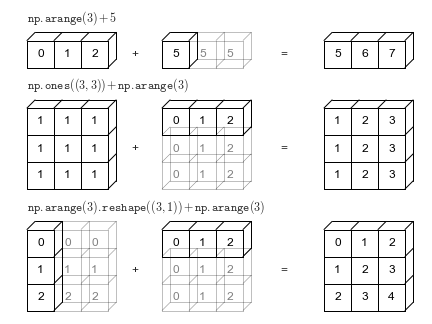


```
x = np.arange(5)
x  # array([0, 1, 2, 3, 4])
y = np.ones_like(x)
y  # array([1, 1, 1, 1, 1])
x + y # array([1, 2, 3, 4, 5])
x + 1 # array([1, 2, 3, 4, 5])
```

```
x = np.vstack([range(7)[i:i + 3] for i in range(5)])
x  
array([[0, 1, 2],
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5],
    [4, 5, 6]])
y = np.arange(5)[:, np.newaxis]
y
array([[0],
       [1],
       [2],
       [3],
       [4]])
x + y
array([[ 0,  1,  2],
       [ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8],
       [ 8,  9, 10]])
y = np.arange(3)
y
array([0, 1, 2])
x + y
array([[0, 2, 4],
       [1, 3, 5],
       [2, 4, 6],
       [3, 5, 7],
       [4, 6, 8]])
```

In [34]:
x = np.vstack([range(7)[i:i + 3] for i in range(5)])
x  

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [35]:
y = np.arange(5)[:, np.newaxis]
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [36]:
x + y

array([[ 0,  1,  2],
       [ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8],
       [ 8,  9, 10]])

In [37]:
y = np.arange(3)
y

array([0, 1, 2])

In [38]:
x+y

array([[0, 2, 4],
       [1, 3, 5],
       [2, 4, 6],
       [3, 5, 7],
       [4, 6, 8]])

## 4 통계 함수

넘파이는 다음과 같은 데이터 집합에 대해 간단한 통계를 계산하는 함수를 제공한다. 

* 데이터의 개수(count)
* 평균(mean, average)
* 분산(variance)
* 표준 편차(standard deviation)
* 최댓값(maximum)
* 최솟값(minimum)
* 중앙값(median)
* 사분위수(quartile)

예를 들어 다음과 같은 데이터 x가 있다고 하자.

x={18,5,10,23,19,−8,10,0,0,5,2,15,8,2,5,4,15,−1,4,−7,−24,7,9,−6,23,−13}
x를 이루는 숫자 하나 하나를 수학 기호로는 x1,x2,⋯,xN처럼 표시한다. 위 예에서 x1=18, x2=5이다.

넘파이에서는 이러한 데이터를 1차원 배열로 구현한다.

```
x = np.array([18,   5,  10,  23,  19,  -8,  10,   0,   0,   5,   2,  15,   8,
              2,   5,   4,  15,  -1,   4,  -7, -24,   7,   9,  -6,  23, -13])
```              

* 데이터의 개수
> 데이터의 개수는 len 명령으로 구할 수 있다.

 > ```
len(x)  # 갯수  
```

* 표본 평균
> 평균을 통계용어로는 표본 평균(sample average, sample mean)이라고 한다. x 데이터에 대한 표본 평균은 x¯라고 표시하며 다음과 같이 계산한다. 이 식에서 N은 데이터의 개수이다.

 >```
  np.mean(x)  # 평균 4.8076923076923075
```

 $$ \bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i $$



* 표본 분산
> 표본 분산(sample variance)은 데이터와 표본 평균간의 거리의 제곱의 평균이다. 표본 분산이 작으면 데이터가 모여있는 것이고 크면 흩어져 있는 것이다. 수학 기호로는 s2이라고 표시하며 다음과 같이 계산한다.

 > ```
 np.var(x)  # 분산 115.23224852071006
 np.var(x, ddof=1)  # 비편향 분산. 추후 공부하게 된다. 119.84153846153846
```

$$ s^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2 $$


* 표본 표준편차
> 표본 표준편차(sample standard variance)는 표본 분산의 양의 제곱근 값이다. s이라고 표시한다.

 > ```
 np.std(x)  # 표준 편차 10.734628476137871
 ```

* 최댓값과 최솟값
> 최댓값(maximum)은 데이터 중에서 가장 큰 값을, 최솟값(minimum)은 가장 작은 값을 의미한다.

 > ``` 
 np.max(x)  # 최댓값 23
 np.min(x)  # 최솟값 -24
 ```
* 중앙값
> 중앙값(median)은 데이터를 크기대로 정렬하였을 때 가장 가운데에 있는 수를 말한다. 만약 데이터의 수가 짝수이면 가장 가운데에 있는 두 수의 평균을 사용한다.

 > ```
 np.median(x)  # 중앙값 5.0
 ```

* 사분위수
> 사분위수(quartile)는 데이터를 가장 작은 수부터 가장 큰 수까지 크기가 커지는 순서대로 정렬하였을 때 1/4, 2/4, 3/4 위치에 있는 수를 말한다. 각각 1사분위수, 2사분위수, 3사분위수라고 한다. 1/4의 위치란 전체 데이터의 수가 만약 100개이면 25번째 순서, 즉 하위 25%를 말한다. 따라서 2사분위수는 중앙값과 같다.

 > 때로는 위치를 1/100 단위로 나눈 백분위수(percentile)을 사용하기도 한다. 1사분위수는 25% 백분위수와 같다.

 >```
 np.percentile(x, 0)  # 최소값 -24.0
 np.percentile(x, 25)  # 1사분위 수 0.0
 np.percentile(x, 50)  # 2사분위 수 5.0
 np.percentile(x, 75)  # 3사분위 수 10.0
 np.percentile(x, 100)  # 최댓값 23.0
 ```

## 5 난수 발생과 카운팅 

파이썬을 이용하여 데이터를 무작위로 섞거나 임의의 수 즉, 난수(random number)를 발생시키는 방법에 대해 알아본다. 이 기능은 주로 NumPy의 random 서브패키지에서 제공한다.




### 시드 설정하기

#### 시드

컴퓨터 프로그램에서는 어떤 특정한 시작 숫자를 정해 주면 컴퓨터가 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성한다. 이런 시작 숫자를 시드(seed)라고 한다. 일단 생성된 난수는 다음번 난수 생성을 위한 시드값이 된다. 따라서 시드값은 한 번만 정해주면 된다. 시드는 보통 현재 시각등을 이용하여 자동으로 정해지지만 사람이 수동으로 설정할 수도 있다. 특정한 시드값이 사용되면 그 다음에 만들어지는 난수들은 모두 예측할 수 있다. 코드에서 무작위 데이터 생성 결과를 예측가능하게 만들고자 한다면 시드를 설정한다.

* seed
> 파이썬에서 시드를 설정하는 함수는 seed이다. 인수로는 0과 같거나 큰 정수를 넣어준다.

> ```
np.random.seed(0)
```

* rand
> 시드를 설정한 후 넘파이 random 서브패키지에 있는 rand 함수로 5개의 난수를 생성해 보자. rand 함수는 0과 1사이의 난수를 발생시키는 함수로 인수로 받은 숫자 횟수만큼 난수를 발생시킨다.

>```
np.random.rand(5) 
```

> 몇번 더 난수를 생성해보자. 사람이 예측할 수 없는 무작위 숫자가 나오는 것을 볼 수 있다.

> ```
np.random.rand(10)
np.random.rand(10)
```

이제 시드를 0으로 재설정하고 다시 난수를 발생시켜 본다.

>```
np.random.seed(0)
np.random.rand(5) 
np.random.rand(10)
np.random.rand(10)
```
아까와 같은 숫자가 나오는 것을 확인할 수 있다.

### 데이터의 순서 바꾸기
* shuffle
> 데이터의 순서를 바꾸려면 shuffle 함수를 사용한다. shuffle 함수도 자체 변환(in-place) 함수로 한 번 사용하면 변수의 값이 바뀌므로 사용에 주의해야 한다.

>```
x = np.arange(10)
x # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.random.shuffle(x)
x # array([3, 6, 4, 5, 2, 9, 7, 8, 1, 0])
```

### 데이터 샘플링
* choice
> 이미 있는 데이터 집합에서 일부를 무작위로 선택하는 것을 표본선택 혹은 샘플링(sampling)이라고 한다. 샘플링에는 choice 함수를 사용한다. choice 함수는 다음과 같은 인수를 가질 수 있다.




> **numpy.random.choice(a, size=None, replace=True, p=None)**
> * a : 배열이면 원래의 데이터, 정수이면 arange(a) 명령으로 데이터 생성
> * size : 정수. 샘플 숫자
> * replace : 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
> * p : 배열. 각 데이터가 선택될 수 있는 확률

> ```
np.random.choice(5, 5, replace=False)  # shuffle 명령과 같다. array([1, 4, 0, 3, 2])
np.random.choice(5, 3, replace=False)  # 3개만 선택 array([2, 1, 3])
np.random.choice(5, 10)  # 반복해서 10개 선택 array([0, 4, 1, 4, 1, 2, 2, 0, 1, 1])
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])  # 선택 확률을 다르게 해서 10개 선택 array([0, 3, 3, 2, 2, 3, 3, 2, 0, 3])
```

### 난수 생성
> 넘파이의 random 서브패키지는 이외에도 난수를 생성하는 다양한 함수를 제공한다. 그 중 가장 간단하고 많이 사용되는 것은 다음 3가지 함수다.

* rand: 0부터 1사이의 균일 분포
* randn: 표준 정규 분포
* randint: 균일 분포의 정수 난수

#### rand
> rand 함수는 0부터 1사이에서 균일한 확률 분포로 실수 난수를 생성한다. 숫자 인수는 생성할 난수의 크기이다. 여러개의 인수를 넣으면 해당 크기를 가진 행렬을 생성한다.

>```
np.random.rand(10)
array([0.95894927, 0.65279032, 0.63505887, 0.99529957, 0.58185033,
       0.41436859, 0.4746975 , 0.6235101 , 0.33800761, 0.67475232])
np.random.rand(3, 5)
array([[0.31720174, 0.77834548, 0.94957105, 0.66252687, 0.01357164],
       [0.6228461 , 0.67365963, 0.971945  , 0.87819347, 0.50962438],
       [0.05571469, 0.45115921, 0.01998767, 0.44171092, 0.97958673]])
```

#### randn
> randn 함수는 기댓값이 0이고 표준편차가 1인 표준 정규 분포(standard normal distribution)를 따르는 난수를 생성한다. 인수 사용법은 rand 명령과 같다.

>```
np.random.randn(10)
array([-0.30237513, -2.2244036 ,  0.72400636,  0.35900276,  1.07612104,
        0.19214083,  0.85292596,  0.01835718,  0.42830357,  0.99627783])
np.random.randn(3, 5)
array([[-0.49114966,  0.71267817,  1.11334035, -2.15367459, -0.41611148],
       [-1.07089699,  0.22113881, -1.12305712, -1.05075796,  1.01207905],
       [ 1.54371643, -0.40211489,  0.8647491 , -0.22686923,  0.81116027]])
```

#### randint
> randint 함수는 다음과 같은 인수를 가진다.

> * numpy.random.randint(low, high=None, size=None)

> 만약 high를 입력하지 않으면 0과 low사이의 숫자를, high를 입력하면 low와 high는 사이의 숫자를 출력한다. size는 난수의 숫자이다.

>```
np.random.randint(10, size=10)
array([0, 4, 3, 6, 9, 8, 0, 8, 5, 9])
np.random.randint(10, 20, size=10)
array([10, 19, 16, 15, 13, 11, 18, 10, 14, 19])
np.random.randint(10, 20, size=(3, 5))
array([[16, 15, 17, 18, 18],
       [19, 12, 18, 16, 16],
       [19, 11, 16, 18, 18]])
```



### 정수 데이터 카운팅

발생시킨 난수가 실수값이면 히스토그램 등을 사용하여 분석하면 되고, 만약 난수가 정수값이면 unique 명령이나 bincount 명령으로 데이터 값을 분석할 수 있다.

#### unique
> unique 함수는 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력한다. return_counts 인수를 True 로 설정하면 각 값을 가진 데이터 갯수도 출력한다.

>```
np.unique([11, 11, 2, 2, 34, 34]) #array([ 2, 11, 34])
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)
index # array(['a', 'b', 'c'], dtype='<U1')
count # array([2, 2, 1])
```

> unique 함수는 데이터에 존재하는 값에 대해서만 갯수를 세므로 데이터 값이 나올 수 있음에도 불구하고 데이터가 하나도 없는 경우에는 정보를 주지 않는다. 예를 들어 주사위를 10번 던졌는데 6이 한 번도 나오지 않으면 이 값을 0으로 세어주지 않는다.

#### bincount
> 특정 범위안의 수인 경우에는 bincount 함수에 minlength 인수를 설정하여 쓰는 것이 더 편리하다. bincount 함수는 0 부터 minlength - 1 까지의 숫자에 대해 각각 카운트를 한다. 데이터가 없을 경우에는 카운트 값이 0이 된다.

```
np.bincount([1, 1, 2, 2, 2, 3], minlength=6) 
```

In [39]:
np.unique([11, 11, 2, 2, 34, 34]) #array([ 2, 11, 34])
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)
index # array(['a', 'b', 'c'], dtype='<U1')
count # array([2, 2, 1])

array([2, 2, 1], dtype=int64)